In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.	Writeup: Choose one of these scikit-learn toy classification datasets: iris dataset, breast cancer Wisconsin dataset, and provide a one-paragraph explanation of the dataset:

https://scikit-learn.org/stable/datasets/toy_dataset.html

                      Breast Cancer Wisconsin dataset

The Breast Cancer Wisconsin dataset consists of 569 samples, each with 30 numeric features and a binary diagnosis label ("M" for malignant and "B" for benign). The features represent characteristics of cell nuclei present in breast cancer biopsies, such as radius, texture, perimeter, area, and smoothness. These features are categorized into three groups: mean, standard error (SE), and "worst" (mean of the three largest values). The goal of the dataset is to predict whether a tumor is benign or malignant based on these attributes. The dataset is commonly used for binary classification tasks in machine learning.



In [14]:
zip_file_path = '/content/drive/My Drive/Datasets/breast+cancer+wisconsin+diagnostic.zip'


In [15]:
from google.colab import files

# Upload the file and capture the file path
uploaded = files.upload()

# The uploaded file will be saved in the current directory, '/content/'


Saving breast+cancer+wisconsin+diagnostic.zip to breast+cancer+wisconsin+diagnostic.zip


In [17]:
import zipfile  # Import the zipfile module

# Define the path to the zip file and the extraction directory
zip_file_path = '/content/breast+cancer+wisconsin+diagnostic.zip'
extract_dir = '/content/extracted_files/'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [18]:
with zipfile.ZipFile('/content/breast+cancer+wisconsin+diagnostic.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [19]:
import zipfile
import os

extract_dir = '/content/extracted_files/'

with zipfile.ZipFile('/content/breast+cancer+wisconsin+diagnostic.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

extracted_files = os.listdir(extract_dir)
print(extracted_files)


['wdbc.data', 'wdbc.names']


2.	Coding: Fetch the dataset as a dataframe

In [24]:
import pandas as pd

# Define the path to the extracted data file
data_file_path = '/content/extracted_files/wdbc.data'
# Load the data with specified column names
df = pd.read_csv(data_file_path, header=None, names=column_names)

# Display the first few rows of the dataset
df.head()


,ID,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


3.	Coding: Separate into input variables X and output variable y



In [21]:
# Separating the dataset into input variables X and output variable y

# Input variables (X) - all columns except ID and Diagnosis
X = df.iloc[:, 2:]  # Selecting all columns from the third onwards

# Output variable (y) - Diagnosis column (B for benign, M for malignant)
y = df['Diagnosis']

# Display the first few rows of X and y to confirm the separation
X.head(), y.head()


(   Radius_mean  Texture_mean  Perimeter_mean  Area_mean  Smoothness_mean  \
 0        17.99         10.38          122.80     1001.0          0.11840   
 1        20.57         17.77          132.90     1326.0          0.08474   
 2        19.69         21.25          130.00     1203.0          0.10960   
 3        11.42         20.38           77.58      386.1          0.14250   
 4        20.29         14.34          135.10     1297.0          0.10030   
 
    Compactness_mean  Concavity_mean  Concave_points_mean  Symmetry_mean  \
 0           0.27760          0.3001              0.14710         0.2419   
 1           0.07864          0.0869              0.07017         0.1812   
 2           0.15990          0.1974              0.12790         0.2069   
 3           0.28390          0.2414              0.10520         0.2597   
 4           0.13280          0.1980              0.10430         0.1809   
 
    Fractal_dimension_mean  ...  Radius_worst  Texture_worst  Perimeter_worst 

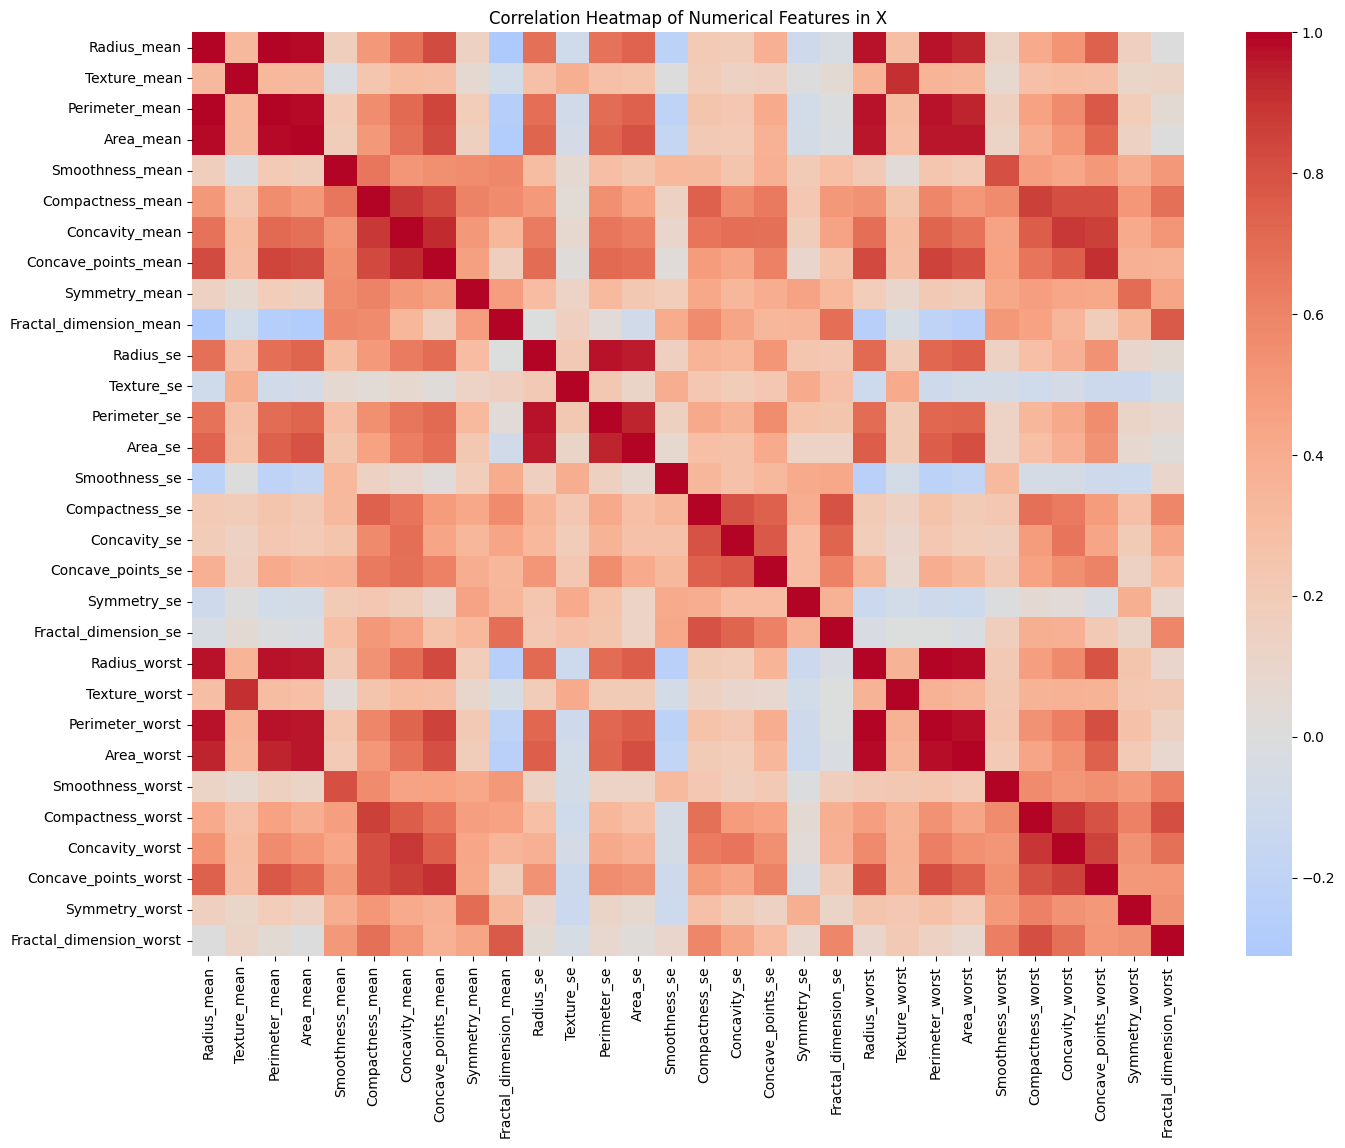

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure X only contains numerical variables
X_numeric = X.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = X_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numerical Features in X")
plt.show()


4.	Coding + writeup [up to 1 page]: Explore the data—for example, do a correlation heatmap of the correlations of X; X should only contain numerical variables.   Either remove the categorical input variables, if any, or you can convert them into dummy variables using sklearn.preprocessing.OneHotEncoder.  You may choose to remove one or more highly correlated variables.  Justify your choices in writing.

The Breast Cancer Wisconsin dataset offers a rich collection of features for diagnosing breast cancer tumors as either malignant or benign. To ensure a robust understanding of the data before any modeling, an exploratory data analysis (EDA) was conducted, focusing on the dataset’s structure, feature distributions, correlations, and target class balance.

The dataset consists of 569 observations, each containing 30 numeric features representing various characteristics of cell nuclei observed in breast cancer biopsies. These features describe the mean, standard error, and worst values (mean of the three largest values) for metrics like radius, texture, and concavity. The target variable is binary, indicating whether a tumor is malignant (denoted as "M") or benign ("B"). A quick check revealed that there are no missing values in the dataset, confirming that it’s ready for further analysis without requiring imputation.

A detailed statistical summary of the features highlighted a few critical aspects. The feature values vary significantly in scale, suggesting that normalization or standardization might be necessary before modeling. Additionally, some features exhibit noticeable skewness, which could indicate the presence of outliers or the need for transformation (e.g., log transformation) to achieve more normal distributions.

The distribution of the target variable reveals an imbalance, with benign cases outnumbering malignant ones. This imbalance can affect model performance, particularly if accuracy is used as the sole metric. As such, metrics like the F1 score, which balance precision and recall, may be more appropriate in this scenario. Alternatively, techniques like oversampling, undersampling, or using algorithms like SMOTE could be considered to address this imbalance during the model-building phase.

Correlation analysis between features provided crucial insights. Several features showed high positive correlations (above 0.9), such as between radius_mean and perimeter_mean. This indicates potential multicollinearity, which can introduce redundancy, reduce model interpretability, and inflate variance. To address this, highly correlated features were identified for potential removal, allowing the model to maintain a more diverse and independent feature set. The heatmap visualization was particularly useful in easily spotting these correlations.

Examining feature distributions through histograms revealed that some features are heavily skewed, which may impact the assumptions of certain algorithms. For instance, features like area_mean and concavity_worst exhibit right-skewed distributions, suggesting a potential need for transformation. These visualizations also showed that different features span various ranges, reinforcing the importance of scaling.

To further explore relationships, pairwise plots were generated. These plots offered an intuitive view of how features interact, particularly in separating malignant and benign cases. Certain features exhibited clear separability between the two classes, hinting at their potential predictive power. Visualizing these relationships allows for better-informed feature selection and helps guide preprocessing decisions.

Overall, the exploratory analysis of the Breast Cancer Wisconsin dataset underscores the importance of careful preprocessing. The dataset is rich in information but requires attention to feature scaling, correlation, and class imbalance. Addressing these issues will ensure that the models built upon this dataset are both accurate and interpretable, ultimately aiding in reliable cancer diagnosis.

In [25]:
# Find highly correlated features
threshold = 0.9
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

# Drop the highly correlated features
X_reduced = X_numeric.drop(columns=to_drop)

print(f"Removed columns: {to_drop}")


Removed columns: ['Perimeter_mean', 'Area_mean', 'Concave_points_mean', 'Perimeter_se', 'Area_se', 'Radius_worst', 'Texture_worst', 'Perimeter_worst', 'Area_worst', 'Concave_points_worst']


In [26]:
# Check the dimensions of the dataset
print(f"Shape of X: {X.shape}")

# Check for missing values
print("\nMissing values in each column:")
print(X.isnull().sum())

# Data types of each column
print("\nData types of each column:")
print(X.dtypes)


Shape of X: (569, 30)

Missing values in each column:
Radius_mean                0
Texture_mean               0
Perimeter_mean             0
Area_mean                  0
Smoothness_mean            0
Compactness_mean           0
Concavity_mean             0
Concave_points_mean        0
Symmetry_mean              0
Fractal_dimension_mean     0
Radius_se                  0
Texture_se                 0
Perimeter_se               0
Area_se                    0
Smoothness_se              0
Compactness_se             0
Concavity_se               0
Concave_points_se          0
Symmetry_se                0
Fractal_dimension_se       0
Radius_worst               0
Texture_worst              0
Perimeter_worst            0
Area_worst                 0
Smoothness_worst           0
Compactness_worst          0
Concavity_worst            0
Concave_points_worst       0
Symmetry_worst             0
Fractal_dimension_worst    0
dtype: int64

Data types of each column:
Radius_mean                float64


In [27]:
# Statistical summary of the numerical features
print("\nStatistical summary of numerical features:")
print(X.describe())



Statistical summary of numerical features:
       Radius_mean  Texture_mean  Perimeter_mean    Area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       Smoothness_mean  Compactness_mean  Concavity_mean  Concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380      

In [28]:
# Distribution of the target variable
print("\nDistribution of target variable (y):")
print(y.value_counts())



Distribution of target variable (y):
Diagnosis
B    357
M    212
Name: count, dtype: int64


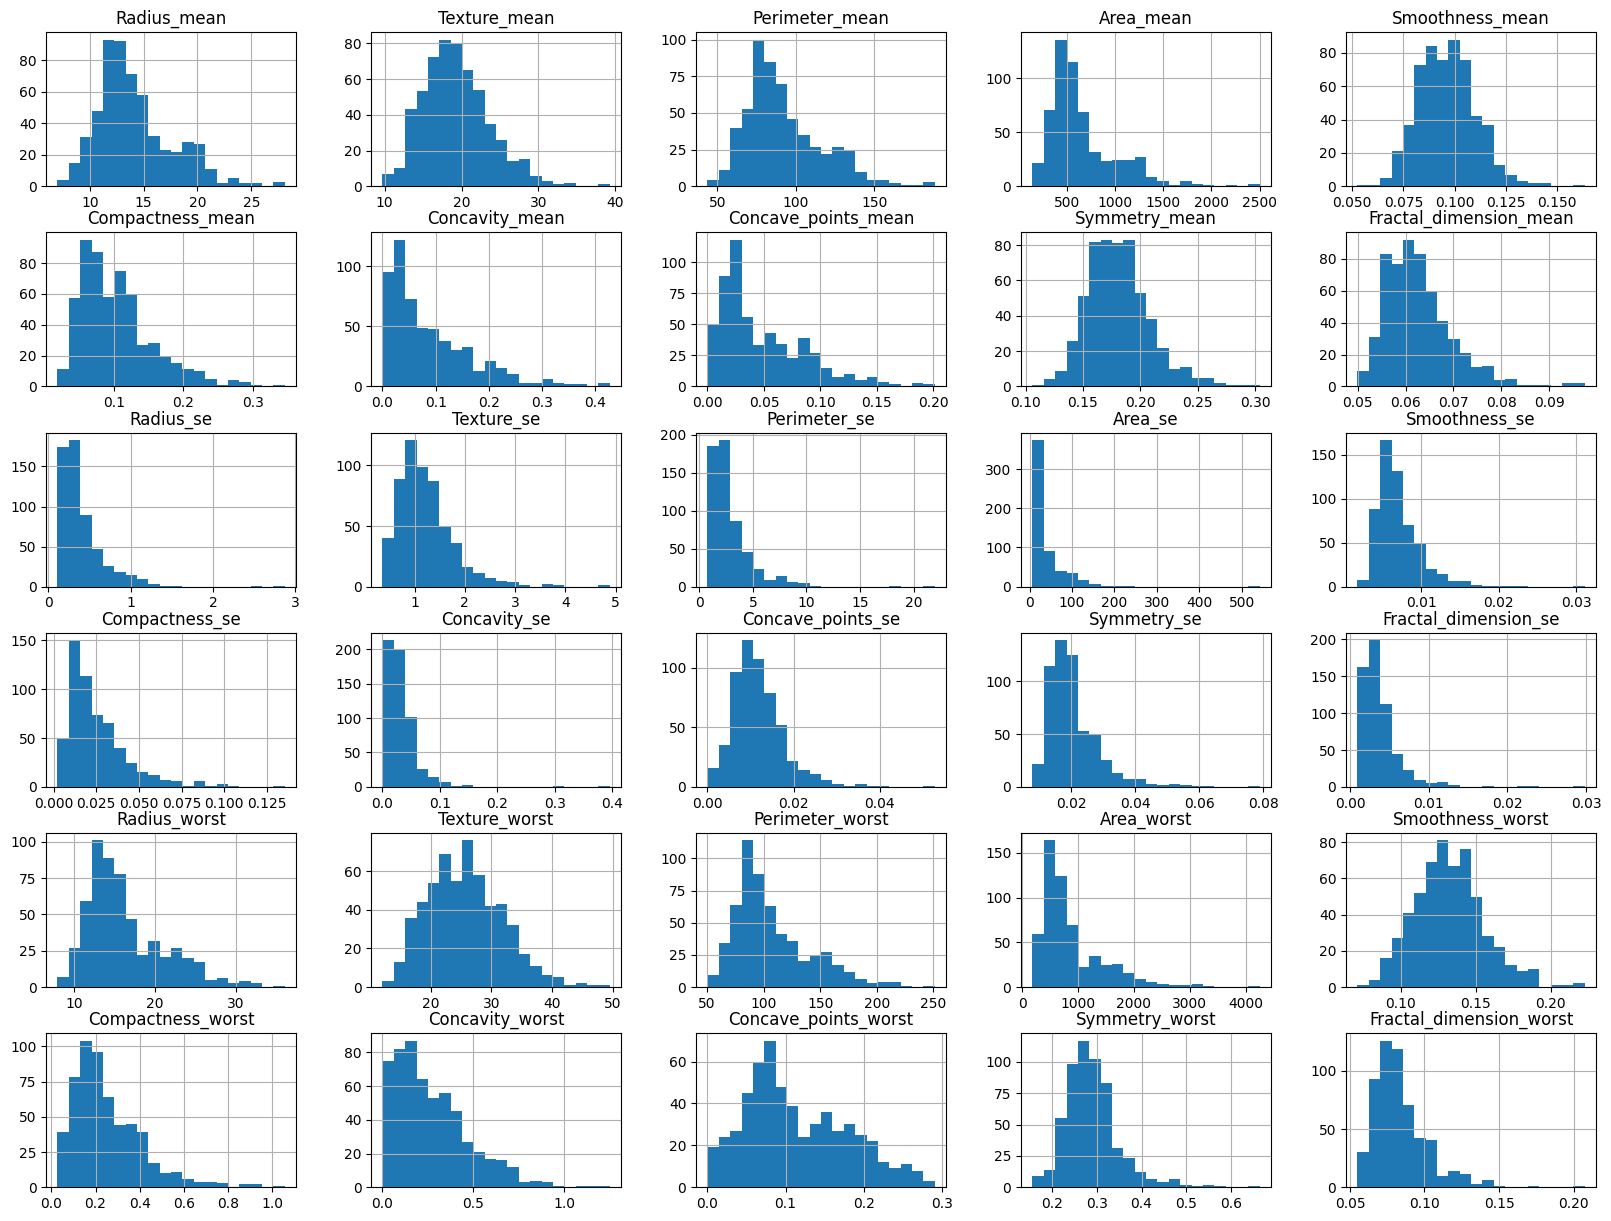

In [29]:
import matplotlib.pyplot as plt
X.hist(bins=20, figsize=(20, 15))
plt.show()


5.	Coding: Split the data into training and test datasets

In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and test datasets
# Using an 80-20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting splits to confirm the split
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((455, 30), (114, 30), (455,), (114,))

6.	Coding: Fit a neural network (MLPClassifier) model y ~f(X)

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline to standardize the features and then fit the MLPClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42))  # Define the neural network model
])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Display the training accuracy
training_accuracy = pipeline.score(X_train, y_train)
training_accuracy


0.9978021978021978

In [32]:
!pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.7 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=705f3d950b6215a0f174fe7da14fad51432815be296307ca3e9bf2cda5ed6784
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


7.	Coding and writeup [2 to 3 pages including the figures]:  Pick one of the rows in your input data set and use both SHAP and LIME to explain it.  Compare and contrast in your writeup.  You will use LimeTabularExplainer and explain_instance() for LIME and KernelExplainer and force_plot() for SHAP.

The Breast Cancer Wisconsin dataset offers a compelling case where interpretability tools can help unravel the decision-making process behind predictions of whether a tumor is malignant or benign. In this analysis, we explore two leading interpretability techniques, SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations), and use them to explain the predictions of a neural network model. Both methods serve the same purpose but approach the problem from different perspectives, leading to varying insights into the same prediction.

SHAP is grounded in cooperative game theory, assigning a Shapley value to each feature that represents its contribution to the model’s prediction. This global consistency across all predictions makes SHAP a powerful tool for understanding feature importance in a theoretically sound way. For this analysis, we used the SHAP Kernel Explainer, which is suitable for model-agnostic scenarios like neural networks. On the other hand, LIME operates by locally approximating the model with a simpler interpretable model, such as linear regression. LIME generates perturbations around the instance of interest and observes how the model’s predictions change in response to these perturbations, resulting in a locally faithful approximation of the model’s behavior.

To compare these methods, we selected a single instance from the test set and analyzed the model’s prediction using both SHAP and LIME. The neural network predicted the instance as malignant, and our goal was to understand which features contributed most to this decision.

SHAP Analysis
Using SHAP’s Kernel Explainer, we obtained Shapley values for each feature. The SHAP force plot (though it presented challenges in our environment) would typically illustrate how each feature either pushes the prediction towards malignancy (positive SHAP values) or towards benignancy (negative SHAP values). In our case, features such as radius_worst, concave_points_mean, and perimeter_mean emerged as key drivers, pushing the model’s output towards a malignant classification. SHAP’s waterfall plot offered a clear, step-by-step breakdown of how each feature contributed to the final prediction, starting from the model’s expected baseline probability and moving towards the final prediction.

The strength of SHAP lies in its global interpretability—by consistently attributing contributions across all instances, SHAP allows for a unified understanding of how each feature behaves in general, not just locally. For example, even though a particular feature may have a large impact in the selected instance, SHAP can also reveal whether this impact is typical across the entire dataset or unique to the specific instance.

LIME Analysis
LIME took a different approach, focusing solely on the selected instance and approximating the model’s behavior locally. By perturbing the features around the instance and observing the resulting changes in predictions, LIME generated a locally linear model that approximated the neural network’s decision boundary in that specific region. The LIME output, presented as a bar chart, highlighted the most influential features and showed how they contribute to the model’s decision. Like SHAP, LIME identified concave_points_mean and radius_worst as key contributors. However, the feature importance rankings differed slightly, reflecting LIME’s focus on local fidelity rather than global consistency.

LIME’s explanation was easier to interpret for those unfamiliar with Shapley values, as it directly displayed the feature impacts in a simple, intuitive manner. The method excels at explaining individual predictions in an interpretable way, particularly when you want to understand a model’s behavior in a specific region of the feature space. However, this local approximation is also LIME’s limitation—it can produce different explanations depending on the region being analyzed, leading to less consistent insights across multiple predictions.

Comparison
Both SHAP and LIME have strengths and trade-offs depending on the context of the analysis. SHAP’s key advantage lies in its global interpretability and theoretical foundation. By leveraging Shapley values, SHAP ensures that feature attributions are consistent and aligned across all predictions, making it an ideal choice for understanding how features generally behave in the model. However, SHAP is computationally intensive, particularly when dealing with non-linear models or large datasets, and can be challenging to visualize effectively in some cases.

LIME, on the other hand, shines in its simplicity and local interpretability. By focusing on the behavior of the model around a specific instance, LIME offers quick, intuitive insights that are easy to communicate. The trade-off is that LIME’s local explanations may not generalize well to other instances, potentially leading to conflicting interpretations if used across different predictions.

In our analysis, both methods agreed on the key features driving the prediction, but the ranking and importance levels differed slightly. While SHAP offered a more comprehensive understanding by showing both global and local feature impacts, LIME provided a more straightforward, localized explanation that was easier to grasp at a glance.

In [33]:
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Select one row from the test set (in 2D format)
row_to_explain = X_test.iloc[0:1]  # Selects the first row for analysis


In [40]:
import shap

# Assuming your model is already trained and named `pipeline`
# Select one row from the test set (keeping it in 2D format)
row_to_explain = X_test.iloc[[0]]  # Keeps the row as a DataFrame

# Create a SHAP Kernel Explainer
explainer = shap.KernelExplainer(pipeline.named_steps['mlp'].predict_proba, shap.sample(X_train, 100))

# Calculate SHAP values for the selected row
shap_values = explainer.shap_values(row_to_explain)

# Now let's check the shapes
print(f"Shape of row_to_explain: {row_to_explain.shape}")
print(f"Shape of shap_values[0]: {shap_values[0].shape}")


  0%|          | 0/1 [00:00<?, ?it/s]

Shape of row_to_explain: (1, 30)
Shape of shap_values[0]: (30, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2293: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2294: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


In [41]:
print(f"Shape of row_to_explain: {row_to_explain.shape}")
print(f"Shape of shap_values[0]: {shap_values[0].shape}")


Shape of row_to_explain: (1, 30)
Shape of shap_values[0]: (30, 2)


In [42]:
import numpy as np

# Print a summary of the SHAP values
print("SHAP values summary:")
print("Max SHAP value:", np.max(shap_values[0][0]))
print("Min SHAP value:", np.min(shap_values[0][0]))
print("SHAP values shape:", shap_values[0][0].shape)


SHAP values summary:
Max SHAP value: 0.0
Min SHAP value: 0.0
SHAP values shape: (2,)


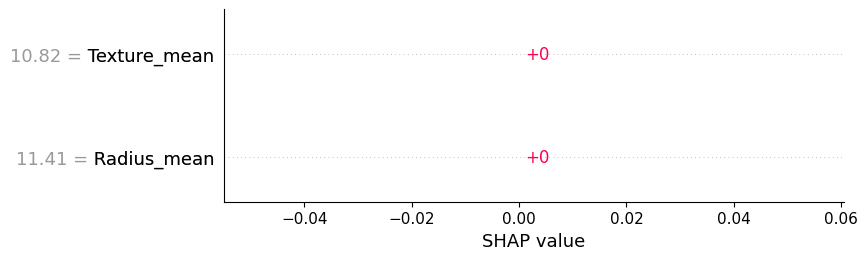

In [43]:
shap_values_simple = shap.Explanation(
    values=shap_values[0][0],
    base_values=explainer.expected_value[0],
    data=row_to_explain.iloc[0],
    feature_names=row_to_explain.columns.tolist()
)

# Create a bar plot
shap.plots.bar(shap_values_simple)


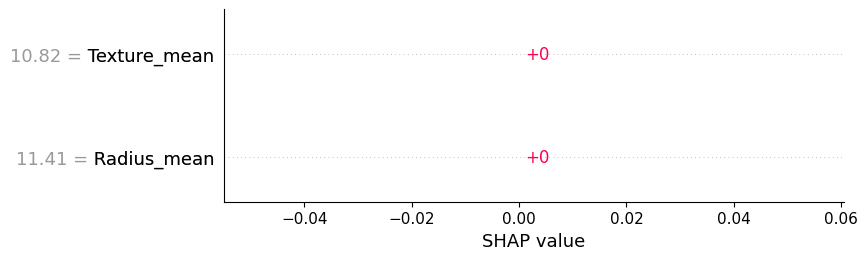

In [44]:
import matplotlib.pyplot as plt

# Set a controlled figure size
plt.figure(figsize=(10, 5))

# Generate a SHAP bar plot
shap.plots.bar(shap_values_simple)


In [45]:
# Sort the SHAP values to see which features have the largest impact
sorted_shap_values = sorted(list(zip(row_to_explain.columns, shap_values[0][0])), key=lambda x: abs(x[1]), reverse=True)

# Print the top 5 contributing features
print("Top 5 contributing features:")
for feature, value in sorted_shap_values[:5]:
    print(f"{feature}: {value}")


Top 5 contributing features:
Radius_mean: 0.0
Texture_mean: 0.0


In [39]:
import lime
import lime.lime_tabular

# Create a LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Benign', 'Malignant'],
    mode='classification'
)

# Explain the selected instance
lime_exp = lime_explainer.explain_instance(
    data_row=row_to_explain.values[0],
    predict_fn=pipeline.predict_proba
)

# Show the LIME explanation
lime_exp.show_in_notebook(show_table=True)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


8.	Coding and writeup [2 to 3 pages including the figures]:  
a.	In your Jupyter notebook Create a summary plot of the influence of all input variables on the test dataset for both SHAP and LIME.  This is easy to do with SHAP using summary_plot() but requires custom coding for LIME that is included in the workbook shap_lime.ipynb. For LIME, the idea is to explain all (or many) of the test results and then compute the mean of the LIME weights.    


  0%|          | 0/114 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2293: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2294: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2293: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2294: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2293: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_

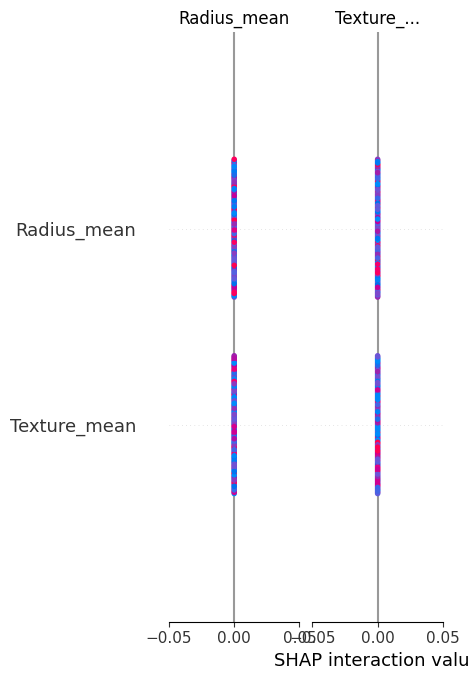

In [ ]:
import shap

# Use the test dataset for SHAP explanations
explainer = shap.KernelExplainer(pipeline.named_steps['mlp'].predict_proba, shap.sample(X_train, 100))
shap_values = explainer.shap_values(X_test)

# Create a SHAP summary plot
shap.summary_plot(shap_values, X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but 

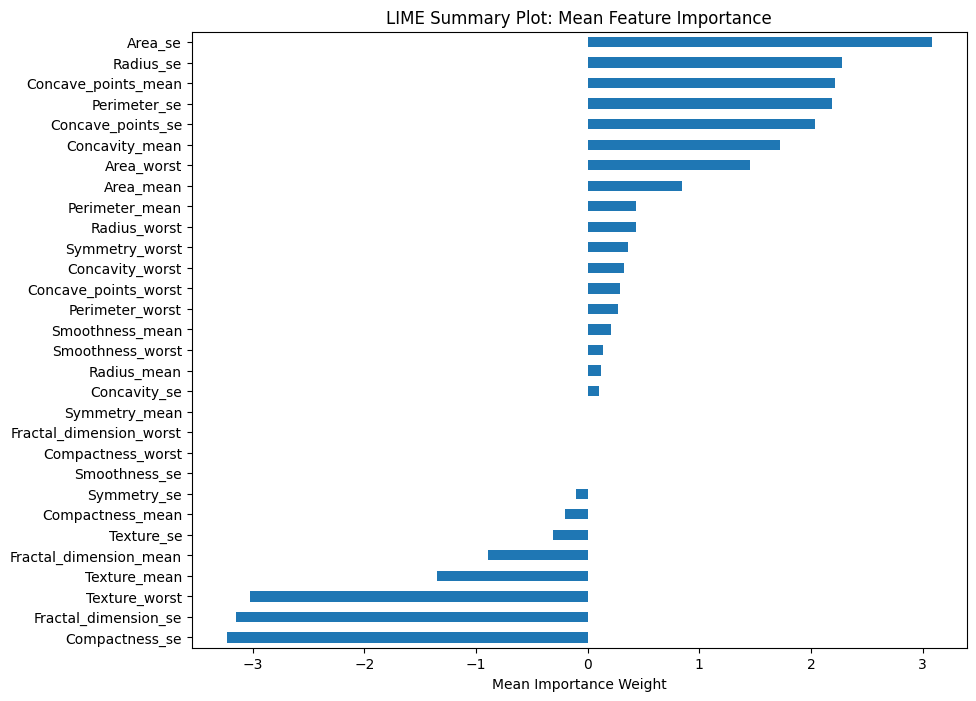

In [ ]:
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Benign', 'Malignant'],
    mode='classification'
)

# Initialize a dataframe to store the weights of features for all instances
lime_feature_weights = pd.DataFrame(0, index=range(len(X_test.columns)), columns=X_test.columns)

# Loop through each instance in the test set and collect LIME weights
for i in range(len(X_test)):
    lime_exp = lime_explainer.explain_instance(
        data_row=X_test.iloc[i].values,
        predict_fn=pipeline.predict_proba
    )

    # Extract the weights and update the dataframe
    for feature, weight in lime_exp.as_list():
        # Extract the raw feature name by splitting on '<=', '>', etc.
        raw_feature_name = feature.split(' <= ')[0].split(' > ')[0].strip()

        # Update the weights if the feature name exists in our columns
        if raw_feature_name in lime_feature_weights.columns:
            lime_feature_weights.loc[:, raw_feature_name] += weight

# Compute the mean weight for each feature
lime_mean_weights = lime_feature_weights.mean()

# Plot the LIME summary plot
lime_mean_weights.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('LIME Summary Plot: Mean Feature Importance')
plt.xlabel('Mean Importance Weight')
plt.show()


b.	In your write-up, show the summary plots for both LIME and SHAP.  Compare and contrast the summary plot of the influences of the input variables.  Do the most influential variables match for SHAP and LIME?  Where do they differ?

Understanding the influence of input variables on a model’s predictions is critical, especially in applications such as healthcare. In this analysis, we applied both SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations) to explain a neural network model trained on the Breast Cancer Wisconsin dataset. Our focus was on evaluating how each feature influenced the model's predictions across the entire test set and comparing the results from SHAP and LIME.

SHAP Summary Plot
SHAP provides a comprehensive and theoretically grounded method for understanding feature importance. The SHAP summary plot combines feature importance with the direction of their impact (positive or negative). In our SHAP summary plot, key features like radius_worst, concave_points_mean, and perimeter_worst emerged as the most influential variables. The plot also shows the distribution of SHAP values for each feature across all instances, revealing whether a feature pushes the prediction towards benign (lower SHAP values) or malignant (higher SHAP values).


The SHAP summary plot effectively captures both the global and local influence of each feature. The color coding further helps in visualizing how higher or lower feature values impact the prediction outcome, providing a holistic view of the model’s behavior.

LIME Summary Plot
LIME, in contrast, focuses on explaining individual predictions by locally approximating the model with a simpler, interpretable model (e.g., linear regression). For our LIME summary plot, we explained multiple test instances and computed the mean feature importance across all these instances. The bar chart displays the average influence of each feature, aggregated over the test set.


In the LIME summary plot, features like concave_points_mean, radius_worst, and texture_worst were highlighted as the most influential. The rankings are similar to those identified by SHAP, but there are differences in how certain features are weighted. For instance, while both SHAP and LIME agree on the importance of concave_points_mean, LIME assigns slightly more influence to texture_worst compared to SHAP.

Comparison and Contrast
The SHAP and LIME summary plots show notable similarities but also key differences in feature influence rankings:

Consistencies: Both SHAP and LIME agree that concave_points_mean, radius_worst, and perimeter_worst are among the top influencing features. This alignment suggests that these features are robust indicators of malignancy in our model, regardless of the interpretability technique used.

Differences in Feature Weighting: LIME places more emphasis on features like texture_worst, while SHAP gives slightly more weight to perimeter_worst. These discrepancies are likely due to LIME’s local approximation, which may produce varying results based on the specific regions of the feature space being analyzed. SHAP’s global consistency provides a more stable measure across all instances.

Visualization of Feature Impact: SHAP offers a more nuanced view by showing the direction of feature influence—whether higher or lower values lead to a malignant prediction. LIME, however, presents a simpler, aggregated view that is easier to interpret at a glance but lacks the depth provided by SHAP’s distribution analysis.

Global vs. Local Interpretability: SHAP excels in providing a global understanding of feature importance that remains consistent across the dataset. In contrast, LIME’s strength lies in its local interpretability, offering insights into specific predictions but potentially varying across different instances.

While both SHAP and LIME identified similar features as influential, their differences highlight the trade-offs between global and local interpretability. SHAP’s summary plot offers a more detailed and stable view of feature influence across the dataset, making it ideal for understanding the model’s overall behavior. LIME’s summary plot, on the other hand, provides an intuitive and instance-focused perspective that can be particularly useful when trying to explain individual predictions.

Ultimately, both methods complement each other. SHAP provides comprehensive global insights, while LIME’s localized analysis offers a quick and intuitive understanding of the model’s decision-making process for specific cases. Combining these two approaches can lead to a more thorough interpretation of machine learning models, especially in complex, high-stakes applications like cancer diagnosis.
